In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
data=pd.read_csv('E:/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
data['date']=pd.to_datetime(data['date'])
data['month']=data['date'].dt.month
data['year']=data['date'].dt.year

In [5]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


In [6]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [7]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,...,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,6.574423,2014.322954
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,...,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,3.115308,0.467616
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,1.000000,2014.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,4.000000,2014.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,6.000000,2014.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,...,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,9.000000,2015.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,12.000000,2015.000000


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

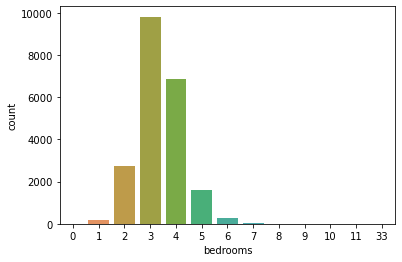

In [8]:
sn.countplot(x='bedrooms',data=data)

<AxesSubplot:xlabel='month', ylabel='count'>

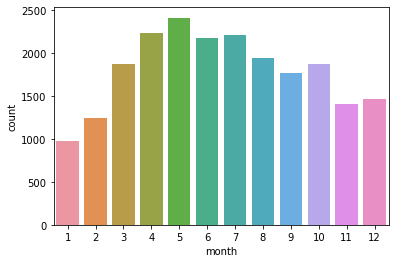

In [9]:
sn.countplot(x='month',data=data)

In [10]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [11]:
dscr_columns=[u'bedrooms',u'bathrooms',u'floors',u'waterfront',u'view',u'condition',u'grade',u'month',u'year']

C:\Users\Ruchit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ruchit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ruchit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ruchit\anaconda3\li

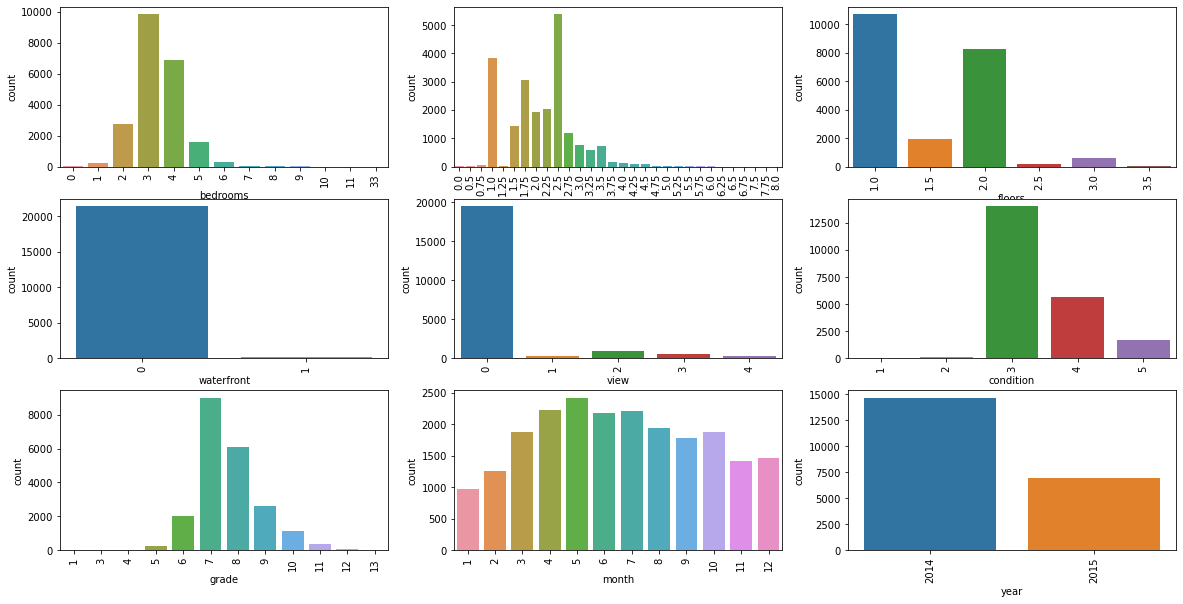

In [12]:
fig, ax=plt.subplots(3,3,figsize=(20,10))
for variable,subplot in zip(dscr_columns,ax.flatten()):
    sn.countplot(data[variable],ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

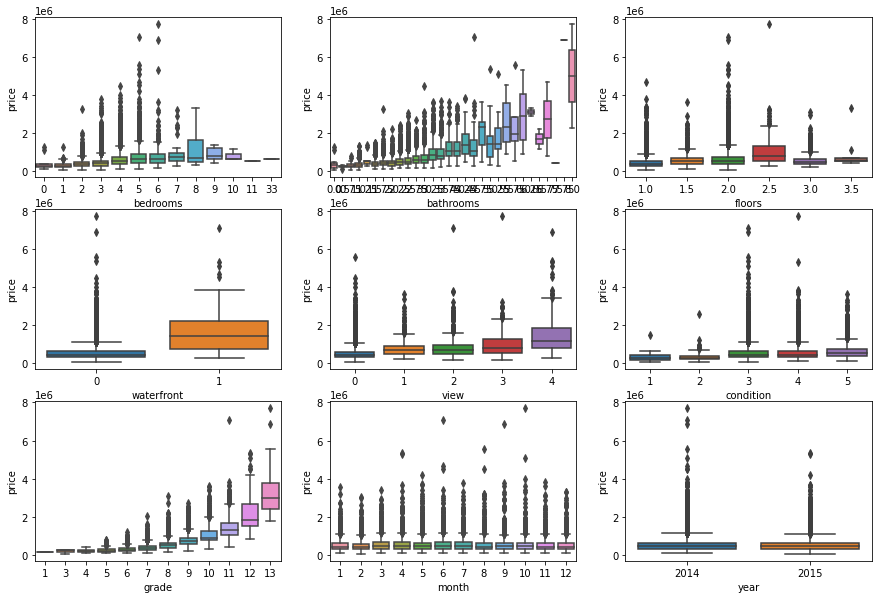

In [13]:
fig, ax= plt.subplots(3, 3, figsize=(15, 10))
for var, subplot in zip(dscr_columns, ax.flatten()):
    sn.boxplot(x=var, y='price', data=data, ax=subplot)

In [14]:
cont_col=[u'sqft_living',u'sqft_lot',u'sqft_above',u'sqft_basement',u'yr_built',u'yr_renovated', u'zipcode',u'lat',u'long',u'sqft_living15',u'sqft_lot15']

C:\Users\Ruchit\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


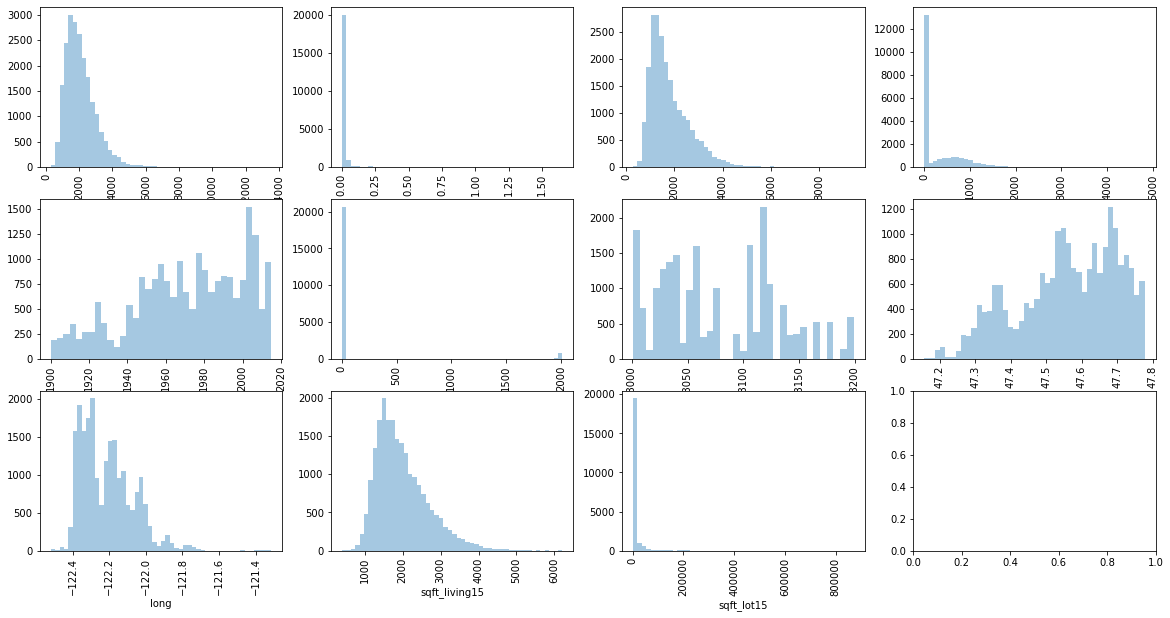

In [15]:
fig, ax=plt.subplots(3,4,figsize=(20,10))
for variable,subplot in zip(cont_col,ax.flatten()):
    sn.distplot(data[variable],ax=subplot,kde=False)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

C:\Users\Ruchit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ruchit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ruchit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ruchit\anaconda3\li

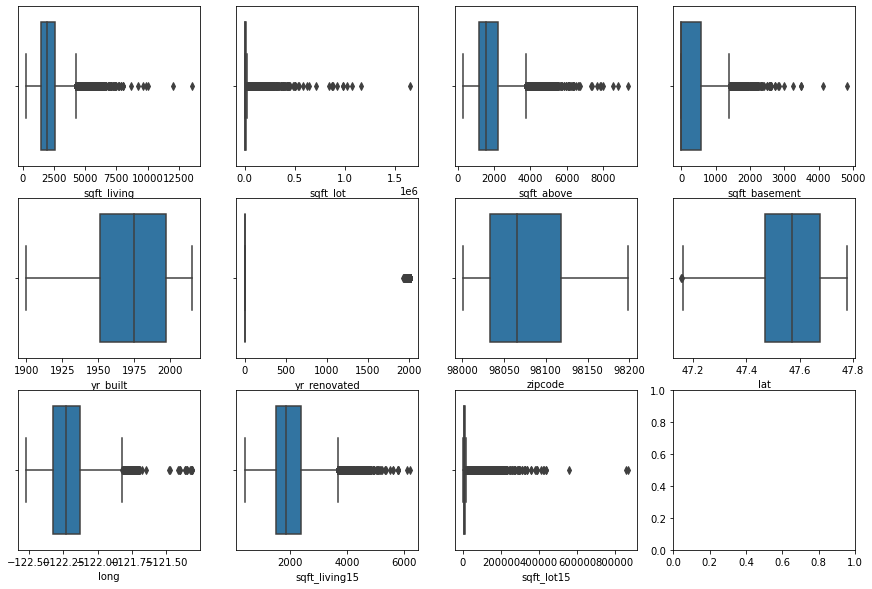

In [16]:
fig, ax= plt.subplots(3, 4, figsize=(15, 10))
for var, subplot in zip(cont_col, ax.flatten()):
    sn.boxplot(data[var], ax=subplot)

In [17]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,...,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,6.574423,2014.322954
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,...,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,3.115308,0.467616
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,1.000000,2014.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,4.000000,2014.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,6.000000,2014.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,...,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,9.000000,2015.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,12.000000,2015.000000


In [18]:
data['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [19]:
np.where(data['bedrooms']==33),np.where(data['bedrooms']==11)

((array([15870], dtype=int64),), (array([8757], dtype=int64),))

In [20]:
data.iloc[[15870,8757],:]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
15870,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,...,580,1947,0,98103,47.6878,-122.331,1330,4700,6,2014
8757,1773100755,2014-08-21,520000.0,11,3.00,3000,4960,2.0,0,0,...,600,1918,1999,98106,47.5560,-122.363,1420,4960,8,2014


In [21]:
data=data.drop(data.index[15870])
data=data.drop(data.index[8757])
data.shape

(21611, 23)

C:\Users\Ruchit\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

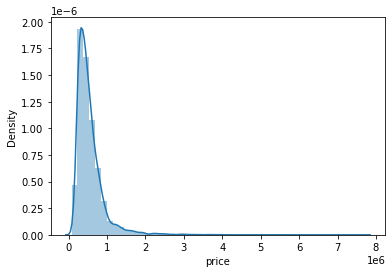

In [22]:
sn.distplot(data['price'])

C:\Users\Ruchit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

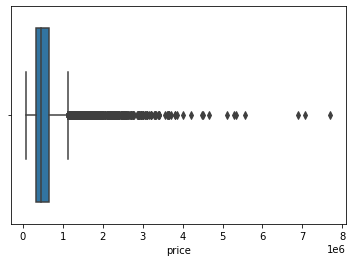

In [23]:
sn.boxplot(data['price'])

C:\Users\Ruchit\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

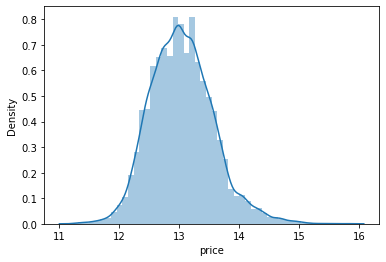

In [24]:
sn.distplot(np.log(data['price']))

C:\Users\Ruchit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

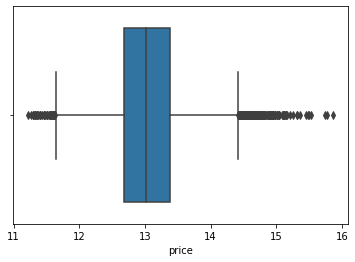

In [25]:
sn.boxplot(np.log(data['price']))

In [26]:
import statsmodels.api as sm

In [27]:
X=data.drop(['id','date','price'],axis=1)
y=data['price']

In [28]:
y=np.log(y)

In [29]:
x=sm.add_constant(X)

In [30]:
model=sm.OLS(y,x)
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     3862.
Date:                Sat, 14 Aug 2021   Prob (F-statistic):               0.00
Time:                        12:50:17   Log-Likelihood:                -803.59
No. Observations:               21611   AIC:                             1647.
Df Residuals:                   21591   BIC:                             1807.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -132.6295     12.436    -10.665      0.000    -157.004    -108.255
bedrooms         -0.0144      0.002     -5.839      0.000      -0.019      -0.010
bathrooms         0.0700      0.004     17.213      0.000       0.062       0.078
sqft_living    9.665e-05   2.85e-06     33.944      0.000    9.11e-05       0.000
sqft_lot       4.636e-07   5.98e-08      7.749      0.000    3.46e-07    5.81e-07
floors            0.0761      0.004     16.953      0.000       0.067       0.085
waterfront        0.3710      0.022     17.116      0.000       0.329       0.414
view              0.0597      0.003     22.330      0.000       0.054       0.065
condition         0.0650      0.003     22.090      0.000       0.059       0.071
grade             0.1591      0.003     59.147      0.000       0.154       0.164
sqft_above      4.05e-05   2.82e-06     14.379      0.000     3.5e-05     4.6e-05
sqft_basement  5.621e-05   3.31e-06     16.995      0.000    4.97e-05    6.27e-05
yr_built         -0.0034   9.07e-05    -37.626      0.000      -0.004      -0.003
yr_renovated   3.826e-05   4.57e-06      8.376      0.000    2.93e-05    4.72e-05
zipcode          -0.0006   4.12e-05    -15.707      0.000      -0.001      -0.001
lat               1.4039      0.013    104.708      0.000       1.378       1.430
long             -0.1585      0.016     -9.666      0.000      -0.191      -0.126
sqft_living15  9.885e-05    4.3e-06     22.962      0.000    9.04e-05       0.000
sqft_lot15    -2.605e-07   9.15e-08     -2.847      0.004    -4.4e-07   -8.12e-08
month             0.0023      0.001      2.623      0.009       0.001       0.004
year              0.0633      0.006     10.755      0.000       0.052       0.075
==============================================================================
Omnibus:                      387.607   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              790.214
Skew:                          -0.048   Prob(JB):                    2.55e-172
Kurtosis:                       3.932   Cond. No.                     3.22e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.12e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Text(0.5, 1.0, 'Residuals vs. Predicted Value')

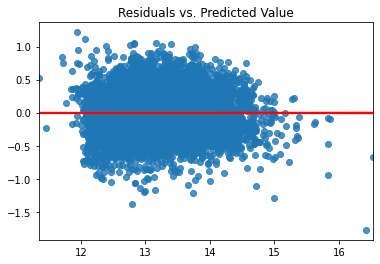

In [31]:
fitted_vals = model.predict()
resids = model.resid

sn.regplot(x=fitted_vals, y=resids,line_kws={'color':'red'})
plt.title('Residuals vs. Predicted Value')

In [32]:
from scipy import stats

C:\Users\Ruchit\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

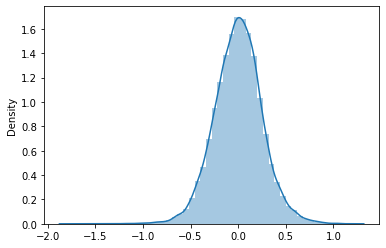

In [33]:
sn.distplot(model.resid)

((array([-3.99701367, -3.78178933, -3.66405957, ...,  3.66405957,
          3.78178933,  3.99701367]),
  array([-1.77441423, -1.37935378, -1.28881499, ...,  1.05653678,
          1.11548171,  1.21594974])),
 (0.25050750211329925, 1.5737509209780923e-12, 0.997313586797665))

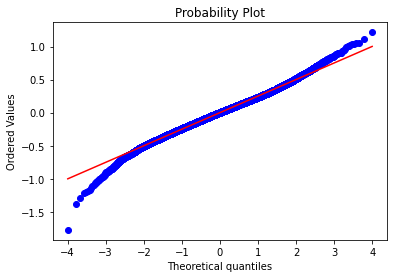

In [34]:
stats.probplot(resids, plot=sn.mpl.pyplot)

In [35]:
resids_standardized = model.get_influence().resid_studentized_internal

<AxesSubplot:>

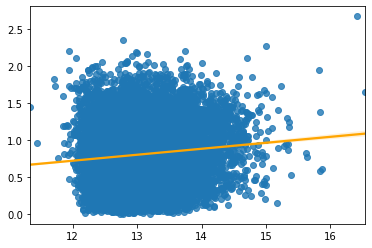

In [36]:
sn.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)),line_kws={'color':'orange'})

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [38]:
vif1= [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
pd.DataFrame(vif1[1:],index=x.columns[1:])


C:\Users\Ruchit\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,0
bedrooms,1.710074
bathrooms,3.362001
sqft_living,inf
sqft_lot,2.102780
floors,2.012528
waterfront,1.204138
view,1.436098
condition,1.253635
grade,3.423022
sqft_above,inf


In [39]:
X2=X.drop(['sqft_living','sqft_above','sqft_basement'],axis=1)
x1=sm.add_constant(X2)

In [40]:
model2=sm.OLS(y,x1)
model2=model2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     4030.
Date:                Sat, 14 Aug 2021   Prob (F-statistic):               0.00
Time:                        12:50:23   Log-Likelihood:                -1372.3
No. Observations:               21611   AIC:                             2781.
Df Residuals:                   21593   BIC:                             2924.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -137.4990     12.758    -10.778      0.000    -162.505    -112.493
bedrooms          0.0153      0.002      6.480      0.000       0.011       0.020
bathrooms         0.1281      0.004     34.051      0.000       0.121       0.135
sqft_lot       5.692e-07   6.13e-08      9.284      0.000    4.49e-07    6.89e-07
floors            0.0667      0.004     16.131      0.000       0.059       0.075
waterfront        0.3946      0.022     17.755      0.000       0.351       0.438
view              0.0664      0.003     24.585      0.000       0.061       0.072
condition         0.0669      0.003     22.228      0.000       0.061       0.073
grade             0.1917      0.003     75.529      0.000       0.187       0.197
yr_built         -0.0039    9.2e-05    -42.273      0.000      -0.004      -0.004
yr_renovated   3.928e-05   4.69e-06      8.376      0.000    3.01e-05    4.85e-05
zipcode          -0.0006   4.22e-05    -13.905      0.000      -0.001      -0.001
lat               1.3957      0.014    102.124      0.000       1.369       1.422
long             -0.1408      0.017     -8.504      0.000      -0.173      -0.108
sqft_living15     0.0002   4.05e-06     37.460      0.000       0.000       0.000
sqft_lot15    -1.003e-07   9.38e-08     -1.070      0.285   -2.84e-07    8.35e-08
month             0.0027      0.001      2.991      0.003       0.001       0.004
year              0.0644      0.006     10.659      0.000       0.053       0.076
==============================================================================
Omnibus:                      339.937   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              663.024
Skew:                           0.035   Prob(JB):                    1.06e-144
Kurtosis:                       3.855   Cond. No.                     7.32e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.32e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Residuals vs. Predicted Value')

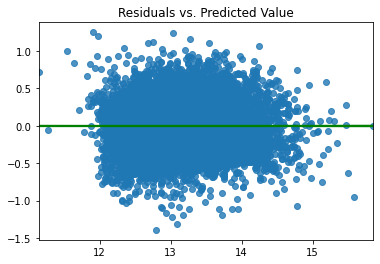

In [41]:
fitted_vals2 = model2.predict()
resids2 = model2.resid

sn.regplot(x=fitted_vals2, y=resids2,line_kws={'color':'green'})
plt.title('Residuals vs. Predicted Value')

C:\Users\Ruchit\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

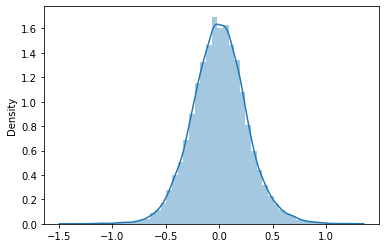

In [42]:
sn.distplot(model2.resid)

((array([-3.99701367, -3.78178933, -3.66405957, ...,  3.66405957,
          3.78178933,  3.99701367]),
  array([-1.3918871 , -1.31454125, -1.21971955, ...,  1.19517595,
          1.23900564,  1.24834925])),
 (0.25723436901362806, 1.6426252508054788e-12, 0.9974950147906658))

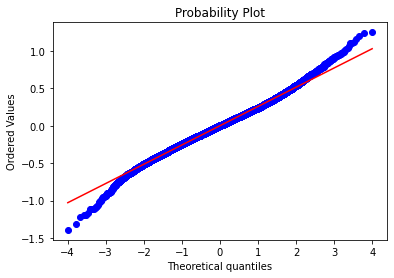

In [43]:
stats.probplot(resids2, plot=sn.mpl.pyplot)

<AxesSubplot:>

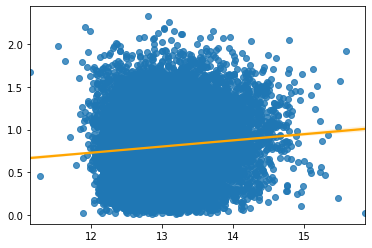

In [44]:
resids_standardized2 = model2.get_influence().resid_studentized_internal
sn.regplot(x=fitted_vals2, y=np.sqrt(np.abs(resids_standardized2)),line_kws={'color':'orange'})

In [45]:
vif2 = [variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
pd.DataFrame({'vif': vif2[1:]}, index=x1.columns[1:])

,vif
bedrooms,1.496166
bathrooms,2.727238
sqft_lot,2.094491
floors,1.617324
waterfront,1.201073
view,1.392093
condition,1.245371
grade,2.889992
yr_built,2.372479
yr_renovated,1.151167


In [46]:
from scipy.stats.stats import pearsonr

for column in x.columns:
    corr_test = pearsonr(x[column], model.resid)
    print(f'Variable: {column} --- correlation: {corr_test[0]:.4f}, p-value: {corr_test[1]:.4f}')

Variable: const --- correlation: nan, p-value: nan
Variable: bedrooms --- correlation: -0.0000, p-value: 1.0000
Variable: bathrooms --- correlation: 0.0000, p-value: 1.0000
Variable: sqft_living --- correlation: 0.0000, p-value: 1.0000
Variable: sqft_lot --- correlation: 0.0000, p-value: 1.0000
Variable: floors --- correlation: 0.0000, p-value: 1.0000
Variable: waterfront --- correlation: 0.0000, p-value: 1.0000
Variable: view --- correlation: 0.0000, p-value: 1.0000
Variable: condition --- correlation: -0.0000, p-value: 1.0000
Variable: grade --- correlation: 0.0000, p-value: 1.0000
Variable: sqft_above --- correlation: 0.0000, p-value: 1.0000
Variable: sqft_basement --- correlation: -0.0000, p-value: 1.0000
Variable: yr_built --- correlation: 0.0000, p-value: 1.0000
Variable: yr_renovated --- correlation: 0.0000, p-value: 1.0000
Variable: zipcode --- correlation: -0.0000, p-value: 1.0000
Variable: lat --- correlation: -0.0000, p-value: 1.0000
Variable: long --- correlation: 0.0000, p

C:\Users\Ruchit\anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [47]:
for column in x1.columns:
    corr_test = pearsonr(x1[column], model2.resid)
    print(f'Variable: {column} --- correlation: {corr_test[0]:.4f}, p-value: {corr_test[1]:.4f}')

Variable: const --- correlation: nan, p-value: nan
Variable: bedrooms --- correlation: 0.0000, p-value: 1.0000
Variable: bathrooms --- correlation: 0.0000, p-value: 1.0000
Variable: sqft_lot --- correlation: 0.0000, p-value: 1.0000
Variable: floors --- correlation: -0.0000, p-value: 1.0000
Variable: waterfront --- correlation: 0.0000, p-value: 1.0000
Variable: view --- correlation: 0.0000, p-value: 1.0000
Variable: condition --- correlation: 0.0000, p-value: 1.0000
Variable: grade --- correlation: 0.0000, p-value: 1.0000
Variable: yr_built --- correlation: 0.0000, p-value: 1.0000
Variable: yr_renovated --- correlation: 0.0000, p-value: 1.0000
Variable: zipcode --- correlation: -0.0000, p-value: 1.0000
Variable: lat --- correlation: -0.0000, p-value: 1.0000
Variable: long --- correlation: 0.0000, p-value: 1.0000
Variable: sqft_living15 --- correlation: 0.0000, p-value: 1.0000
Variable: sqft_lot15 --- correlation: 0.0000, p-value: 1.0000
Variable: month --- correlation: -0.0000, p-value:

In [48]:
X.apply(np.var, axis=0)

bedrooms         8.217366e-01
bathrooms        5.931363e-01
sqft_living      8.435238e+05
sqft_lot         1.715730e+09
floors           2.915784e-01
waterfront       7.485567e-03
view             5.872647e-01
condition        4.233613e-01
grade            1.381727e+00
sqft_above       6.857232e+05
sqft_basement    1.958735e+05
yr_built         8.626805e+02
yr_renovated     1.611837e+05
zipcode          2.862855e+03
lat              1.920003e-02
long             1.983188e-02
sqft_living15    4.697482e+05
sqft_lot15       7.455469e+08
month            9.705482e+00
year             2.186652e-01
dtype: float64

In [49]:
x3=x1.drop(['sqft_lot15'],axis=1)
x3.head()


,const,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,month,year
0,1.0,3,1.00,5650,1.0,0,0,3,7,1955,0,98178,47.5112,-122.257,1340,10,2014
1,1.0,3,2.25,7242,2.0,0,0,3,7,1951,1991,98125,47.7210,-122.319,1690,12,2014
2,1.0,2,1.00,10000,1.0,0,0,3,6,1933,0,98028,47.7379,-122.233,2720,2,2015
3,1.0,4,3.00,5000,1.0,0,0,5,7,1965,0,98136,47.5208,-122.393,1360,12,2014
4,1.0,3,2.00,8080,1.0,0,0,3,8,1987,0,98074,47.6168,-122.045,1800,2,2015


In [50]:
model3=sm.OLS(y,x3)
model3=model3.fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     4282.
Date:                Sat, 14 Aug 2021   Prob (F-statistic):               0.00
Time:                        12:50:29   Log-Likelihood:                -1372.9
No. Observations:               21611   AIC:                             2780.
Df Residuals:                   21594   BIC:                             2915.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -137.6156     12.757    -10.787      0.000    -162.621    -112.610
bedrooms          0.0154      0.002      6.516      0.000       0.011       0.020
bathrooms         0.1281      0.004     34.060      0.000       0.121       0.136
sqft_lot       5.236e-07   4.41e-08     11.868      0.000    4.37e-07     6.1e-07
floors            0.0668      0.004     16.174      0.000       0.059       0.075
waterfront        0.3943      0.022     17.742      0.000       0.351       0.438
view              0.0664      0.003     24.580      0.000       0.061       0.072
condition         0.0668      0.003     22.213      0.000       0.061       0.073
grade             0.1917      0.003     75.536      0.000       0.187       0.197
yr_built         -0.0039    9.2e-05    -42.281      0.000      -0.004      -0.004
yr_renovated   3.921e-05   4.69e-06      8.362      0.000       3e-05    4.84e-05
zipcode          -0.0006   4.22e-05    -13.916      0.000      -0.001      -0.001
lat               1.3961      0.014    102.190      0.000       1.369       1.423
long             -0.1424      0.016     -8.632      0.000      -0.175      -0.110
sqft_living15     0.0002   4.04e-06     37.492      0.000       0.000       0.000
month             0.0027      0.001      2.982      0.003       0.001       0.004
year              0.0644      0.006     10.655      0.000       0.053       0.076
==============================================================================
Omnibus:                      338.735   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              660.112
Skew:                           0.034   Prob(JB):                    4.56e-144
Kurtosis:                       3.853   Cond. No.                     7.24e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.24e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
vif3= [variance_inflation_factor(x3.values, i) for i in range(x3.shape[1])]
pd.DataFrame({'vif': vif3[1:]}, index=x3.columns[1:])

,vif
bedrooms,1.494751
bathrooms,2.727075
sqft_lot,1.084824
floors,1.615607
waterfront,1.200846
view,1.392063
condition,1.245027
grade,2.889900
yr_built,2.372389
yr_renovated,1.150938


In [52]:
np.log(221900.0)

12.309982108920686

In [53]:
np.exp(model3.predict()).round()[:10]

array([ 273246.,  557287.,  465966.,  420902.,  444869., 1731293.,
        281190.,  266934.,  310575.,  310549.])

In [54]:
data['price'][:10]

0     221900.0
1     538000.0
2     180000.0
3     604000.0
4     510000.0
5    1225000.0
6     257500.0
7     291850.0
8     229500.0
9     323000.0
Name: price, dtype: float64

In [55]:
x=x3.iloc[:,1:]
x.head()

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,month,year
0,3,1.00,5650,1.0,0,0,3,7,1955,0,98178,47.5112,-122.257,1340,10,2014
1,3,2.25,7242,2.0,0,0,3,7,1951,1991,98125,47.7210,-122.319,1690,12,2014
2,2,1.00,10000,1.0,0,0,3,6,1933,0,98028,47.7379,-122.233,2720,2,2015
3,4,3.00,5000,1.0,0,0,5,7,1965,0,98136,47.5208,-122.393,1360,12,2014
4,3,2.00,8080,1.0,0,0,3,8,1987,0,98074,47.6168,-122.045,1800,2,2015


In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
lr=LinearRegression(normalize=True)

In [60]:
lr.fit(x_train,y_train)

LinearRegression(normalize=True)

In [61]:
lr.score(x_train,y_train)

0.7613092349465063

In [62]:
lr.score(x_test,y_test)

0.7575697769372133

In [63]:
y_pred=lr.predict(x_test)
y_pred=np.exp(y_pred).round()
y_pred

array([362804., 364768., 324622., ..., 554653., 691532., 409286.])

In [64]:
cmp=pd.DataFrame({'actual':np.exp(y_test),'predicted':y_pred})
cmp

,actual,predicted
4982,476900.0,362804.0
10255,295000.0,364768.0
4044,269900.0,324622.0
21271,320000.0,424587.0
10495,347500.0,399437.0
...,...,...
11757,160000.0,403915.0
85,940000.0,704724.0
7708,592500.0,554653.0
167,807100.0,691532.0


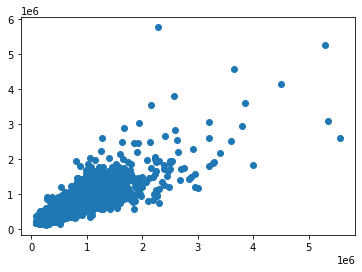

In [65]:
plt.scatter(cmp.actual,cmp.predicted)